# Homework #3 

### Solution 1)



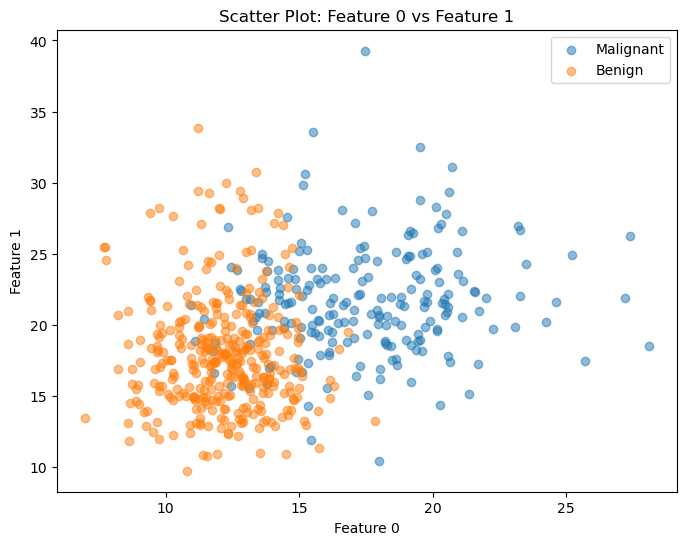

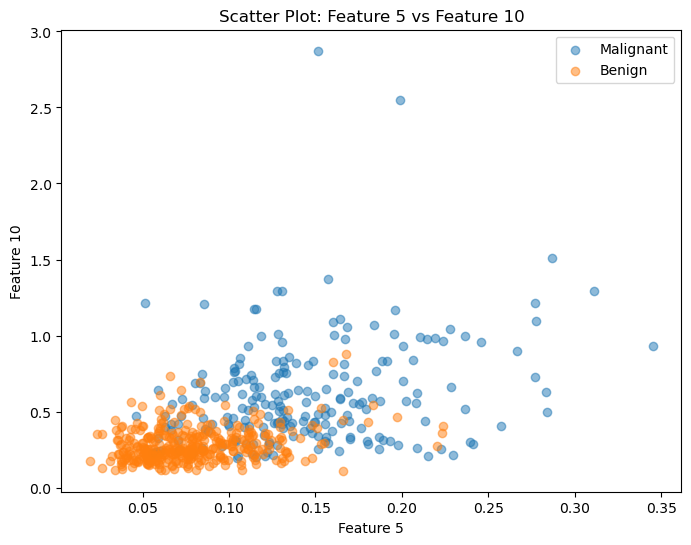

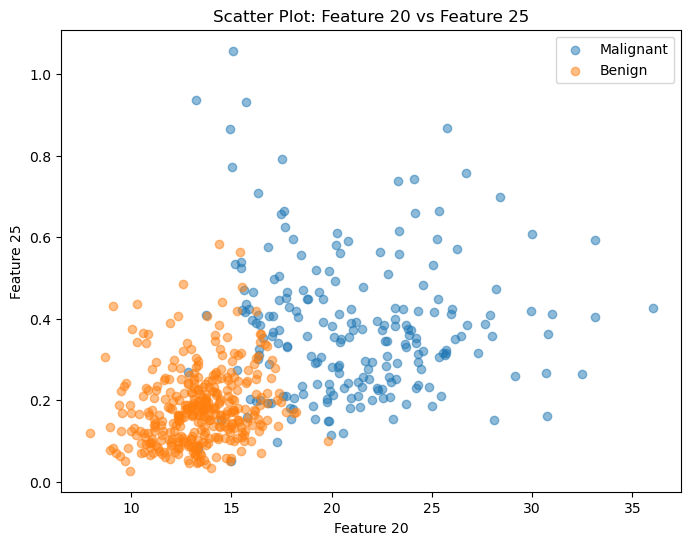

Top 5 most important features for Decision Tree: ['mean concave points' 'worst concave points' 'worst radius'
 'worst perimeter' 'worst texture']
Decision Tree Classifier: 0.9210526315789473
Logistic Regression Performed: 0.956140350877193
Logistic Regression performed better on the test set with an accuracy of: 0.956140350877193


/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

#Task 1: Create scatter plots for feature pairs
def scatter_plot(X, y, feature1, feature2):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, feature1], X[y == 0, feature2], label="Malignant", alpha=0.5)
    plt.scatter(X[y == 1, feature1], X[y == 1, feature2], label="Benign", alpha=0.5)
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.legend()
    plt.title(f'Scatter Plot: Feature {feature1} vs Feature {feature2}')
    plt.show()

#Show a few example scatter plots
scatter_plot(X, y, feature1=0, feature2=1)
scatter_plot(X, y, feature1=5, feature2=10)
scatter_plot(X, y, feature1=20, feature2=25)

#Task 2: Create a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#Task 3: Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#Task 4: Get the top 5 most important features for Decision Tree
feature_importances = dt_classifier.feature_importances_
top_5_features_indices = np.argsort(feature_importances)[-5:][::-1]
top_5_features = data.feature_names[top_5_features_indices]
print("Top 5 most important features for Decision Tree:", top_5_features)

#Task 5: Train a Logistic Regression model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

#Task 6: Compare model performance
dt_accuracy = dt_classifier.score(X_test, y_test)
lr_accuracy = lr_classifier.score(X_test, y_test)

#Output Results
print("Decision Tree Classifier:", dt_accuracy)
print("Logistic Regression Performed:", lr_accuracy)

if dt_accuracy > lr_accuracy:
    print("Decision Tree performed better on the test set with an accuracy of:", dt_accuracy)
else:
    print("Logistic Regression performed better on the test set with an accuracy of:", lr_accuracy)

### Solution 2)


Best max_depth: 3


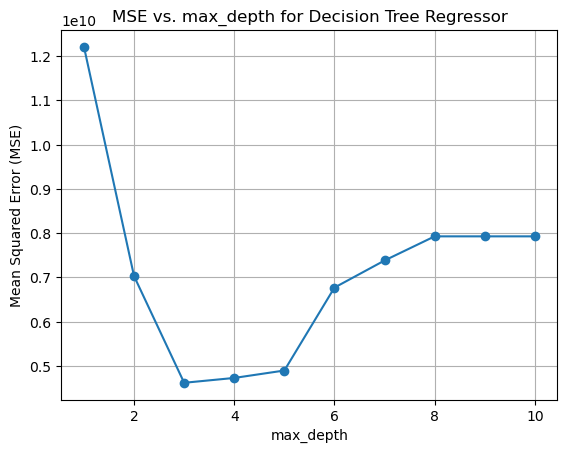

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

#Load the house price prediction dataset
df = pd.read_csv('./DATA602repo/toy_house_prices.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

#Split the data into features (X) and target variable (y)
X = df[['Size', 'Bedrooms']]
y = df['Price']

#Split the data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Try different values for max_depth and find the best one on the validation set
max_depths = range(1, 11)
mse_scores = []

for max_depth in max_depths:
    #Train a decision tree regressor with the current max_depth
    regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=4)
    regressor.fit(X_train, y_train)
    
    #Make predictions on the validation set
    y_pred = regressor.predict(X_val)
    
    #Calculate mean squared error (MSE) on the validation set
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

#Plot the MSE scores for different max_depth values
plt.plot(max_depths, mse_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. max_depth for Decision Tree Regressor')
plt.grid(True)

#Find the best max_depth
best_max_depth = max_depths[np.argmin(mse_scores)]
print(f"Best max_depth: {best_max_depth}")

